In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
raw_data = pd.read_csv('IPL_Matches_2008_2022.csv')
raw_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [3]:
raw_data.shape

(950, 20)

In [4]:
raw_data.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

# Data Cleaning

### Many teams not playing now ipl so fixing with new data
    Kings XI Punjab named Punjab Kings  
    Delhi Daredevils named Delhi Capitals  
    Deccan Chargers named Sunrisers Hyderabad  
    Rising Pune Supergiant, Rising Pune Supergiants, Pune Warriors, Gujarat Lions, Kochi Tuskers Kerala dont play matches anymore

In [5]:
def change_names(obj: str):
    not_playing = [
    'Rising Pune Supergiant', 
    'Rising Pune Supergiants', 
    'Pune Warriors', 
    'Gujarat Lions', 
    'Kochi Tuskers Kerala'
    ]
    if obj in not_playing:
        return np.nan
    elif obj == 'Kings XI Punjab':
        return 'Punjab Kings'
    elif obj == 'Delhi Daredevils':
        return 'Delhi Capitals'
    elif obj == 'Deccan Chargers':
        return 'Sunrisers Hyderabad'
    else:
        return obj

In [6]:
raw_data['Team1'] = raw_data['Team1'].apply(change_names)
raw_data['Team2'] = raw_data['Team2'].apply(change_names)
raw_data['WinningTeam'] = raw_data['WinningTeam'].apply(change_names)

### Season, City, TossWinner, TossDecision, SuperOver, Margin, method, Umpire1, Umpire2 columns are unnecessary for my model

In [7]:
cls = ['Season', 'City', 'TossWinner', 'Team1', 'Team2', 'TossDecision', 'SuperOver', 'Margin', 'method', 'Umpire1', 'Umpire2']
raw_data.drop(columns=cls, axis=1, inplace=True)

### Filtering and cleaning of data columns
    1 Date is in date format we dont need so we have to make it year
    2 winning team and player of the match have some null values in same row
    3 Team1Players and Team2Players is in list format i have to rectify

In [8]:
raw_data.dropna(inplace=True, axis=0)

### Fixing Date

In [9]:
for i in range(len(raw_data)):
    raw_data.iloc[i, 1] = raw_data.iloc[i, 1].split('-')[0]
raw_data['Date'] = raw_data['Date'].astype(int)

### Fixing and player of the match

In [10]:
for i in range(len(raw_data)):
    raw_data.iloc[i, 7] = ','.join(eval(raw_data.iloc[i, 7]))

In [11]:
for i in range(len(raw_data)):
    raw_data.iloc[i, 8] = ','.join(eval(raw_data.iloc[i, 8]))

In [12]:
raw_data.head(2)

,ID,Date,MatchNumber,Venue,WinningTeam,WonBy,Player_of_Match,Team1Players,Team2Players
0,1312200,2022,Final,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Wickets,HH Pandya,"YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...","WP Saha,Shubman Gill,MS Wade,HH Pandya,DA Mill..."
1,1312199,2022,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Wickets,JC Buttler,"V Kohli,F du Plessis,RM Patidar,GJ Maxwell,MK ...","YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO..."


In [13]:
raw_data.shape

(900, 9)

In [14]:
raw_data.isna().sum()

ID                 0
Date               0
MatchNumber        0
Venue              0
WinningTeam        0
WonBy              0
Player_of_Match    0
Team1Players       0
Team2Players       0
dtype: int64

In [15]:
raw_data1 = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
raw_data1.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [16]:
df = pd.DataFrame(raw_data1.groupby(['ID', 'innings', 'BattingTeam'], sort=False)['total_run'].sum()).reset_index()
first_innings = df[df['innings']==1]
second_innings = df[df['innings']==2]
df = first_innings.merge(second_innings, on='ID')
df.drop(columns=['innings_x', 'innings_y'], axis=1, inplace=True)
df.head()

,ID,BattingTeam_x,total_run_x,BattingTeam_y,total_run_y
0,1312200,Rajasthan Royals,130,Gujarat Titans,133
1,1312199,Royal Challengers Bangalore,157,Rajasthan Royals,161
2,1312198,Royal Challengers Bangalore,207,Lucknow Super Giants,193
3,1312197,Rajasthan Royals,188,Gujarat Titans,191
4,1304116,Sunrisers Hyderabad,157,Punjab Kings,160


In [17]:
raw_data = raw_data.merge(df, on='ID')
raw_data.columns = [
    'id', 'Season', 'Match', 'Venue', 'Winner', 'Wonby', 'PlayerOfTheMatch', 'Team1Players', 'Team2Players', 'Team1', 'Team1Run', 'Team2', 'Team2run'
]
raw_data.head()

,id,Season,Match,Venue,Winner,Wonby,PlayerOfTheMatch,Team1Players,Team2Players,Team1,Team1Run,Team2,Team2run
0,1312200,2022,Final,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Wickets,HH Pandya,"YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...","WP Saha,Shubman Gill,MS Wade,HH Pandya,DA Mill...",Rajasthan Royals,130,Gujarat Titans,133
1,1312199,2022,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Wickets,JC Buttler,"V Kohli,F du Plessis,RM Patidar,GJ Maxwell,MK ...","YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...",Royal Challengers Bangalore,157,Rajasthan Royals,161
2,1312198,2022,Eliminator,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Runs,RM Patidar,"V Kohli,F du Plessis,RM Patidar,GJ Maxwell,MK ...","Q de Kock,KL Rahul,M Vohra,DJ Hooda,MP Stoinis...",Royal Challengers Bangalore,207,Lucknow Super Giants,193
3,1312197,2022,Qualifier 1,"Eden Gardens, Kolkata",Gujarat Titans,Wickets,DA Miller,"YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...","WP Saha,Shubman Gill,MS Wade,HH Pandya,DA Mill...",Rajasthan Royals,188,Gujarat Titans,191
4,1304116,2022,70,"Wankhede Stadium, Mumbai",Punjab Kings,Wickets,Harpreet Brar,"PK Garg,Abhishek Sharma,RA Tripathi,AK Markram...","JM Bairstow,S Dhawan,M Shahrukh Khan,MA Agarwa...",Sunrisers Hyderabad,157,Punjab Kings,160


# Data Inserting in mysql server

In [18]:
import mysql.connector
  
db = mysql.connector.connect(
  host ="localhost",
  user ="root",
  passwd ="12345678rk"
)
cursor = db.cursor()

In [19]:
cursor.execute('show databases')
cursor.fetchall()

[('information_schema',),
 ('ipl',),
 ('mysql',),
 ('performance_schema',),
 ('test',)]

In [20]:
cursor.execute('show databases')
cursor.fetchall()

[('information_schema',),
 ('ipl',),
 ('mysql',),
 ('performance_schema',),
 ('test',)]

In [21]:
from sqlalchemy import create_engine
engine = create_engine(
    "mysql+pymysql://" + "root" + ":" + "12345678rk" + "@" + "localhost" + ":" + "3306" + "/" + "ipl" + "?" + "charset=utf8mb4"
)

In [22]:
raw_data.to_sql('matches', engine, index=False)

900

# EDA

In [23]:
raw_data.head()

,id,Season,Match,Venue,Winner,Wonby,PlayerOfTheMatch,Team1Players,Team2Players,Team1,Team1Run,Team2,Team2run
0,1312200,2022,Final,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Wickets,HH Pandya,"YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...","WP Saha,Shubman Gill,MS Wade,HH Pandya,DA Mill...",Rajasthan Royals,130,Gujarat Titans,133
1,1312199,2022,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Wickets,JC Buttler,"V Kohli,F du Plessis,RM Patidar,GJ Maxwell,MK ...","YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...",Royal Challengers Bangalore,157,Rajasthan Royals,161
2,1312198,2022,Eliminator,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Runs,RM Patidar,"V Kohli,F du Plessis,RM Patidar,GJ Maxwell,MK ...","Q de Kock,KL Rahul,M Vohra,DJ Hooda,MP Stoinis...",Royal Challengers Bangalore,207,Lucknow Super Giants,193
3,1312197,2022,Qualifier 1,"Eden Gardens, Kolkata",Gujarat Titans,Wickets,DA Miller,"YBK Jaiswal,JC Buttler,SV Samson,D Padikkal,SO...","WP Saha,Shubman Gill,MS Wade,HH Pandya,DA Mill...",Rajasthan Royals,188,Gujarat Titans,191
4,1304116,2022,70,"Wankhede Stadium, Mumbai",Punjab Kings,Wickets,Harpreet Brar,"PK Garg,Abhishek Sharma,RA Tripathi,AK Markram...","JM Bairstow,S Dhawan,M Shahrukh Khan,MA Agarwa...",Sunrisers Hyderabad,157,Punjab Kings,160


### Max winner team

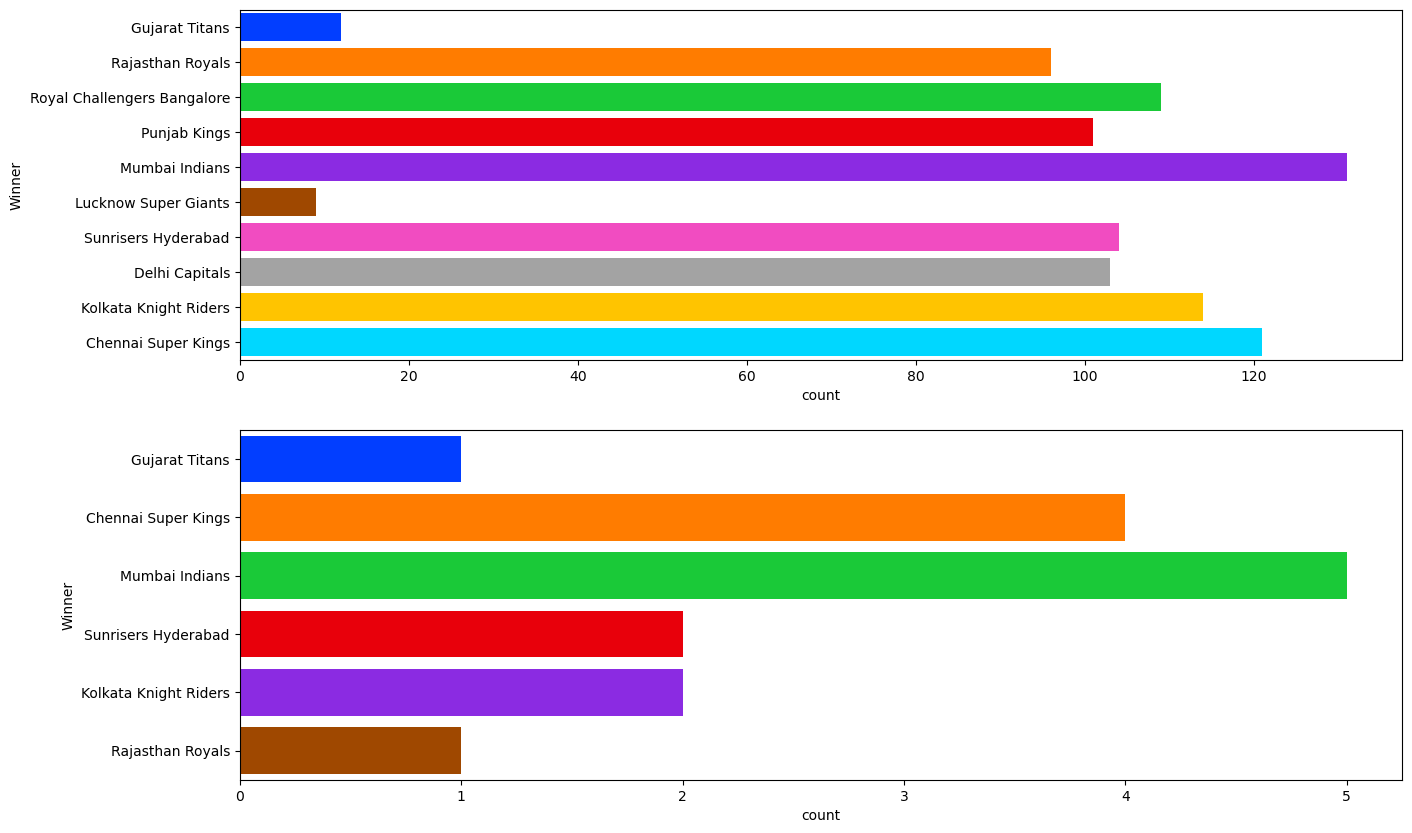

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.countplot(y=raw_data['Winner'], palette='bright', saturation=1)
plt.subplot(212)
sns.countplot(y=raw_data[raw_data['Match']=='Final']['Winner'], palette='bright', saturation=1)
plt.show()

Mumbai indians won most of the match and most of the finals

### Player of the match

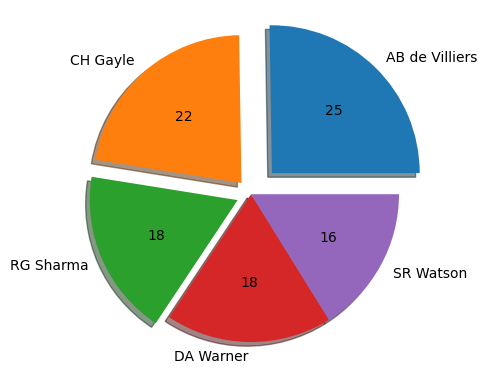

In [25]:
top_players = pd.DataFrame(
    raw_data.groupby('PlayerOfTheMatch')['id'].count()
).sort_values(by='id', ascending=False)[:5]

plt.pie(
    top_players['id'], labels=top_players['id'].index,
    shadow=True, autopct='%1i', explode=[0.2, 0.1, 0.1, 0, 0]
)
plt.show()

### most played ground

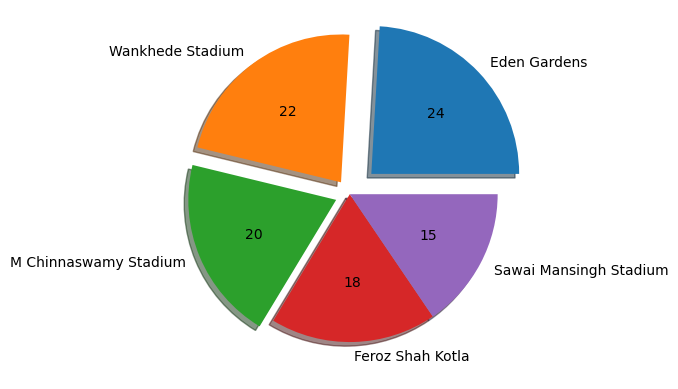

In [26]:
top_venue = pd.DataFrame(
    raw_data.groupby('Venue')['id'].count()
).sort_values(by='id', ascending=False)[:5]

plt.pie(
    top_venue['id'], labels=top_venue['id'].index,
    shadow=True, autopct='%1i', explode=[0.2, 0.1, 0.1, 0, 0]
)
plt.show()

Eden garden is most ipl played ground